# Maximum Likelihood Estimation

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [25]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-16.789727
1,-9.595960,-28.273278
2,-9.191919,-13.206354
3,-8.787879,-2.159996
4,-8.383838,-13.658483


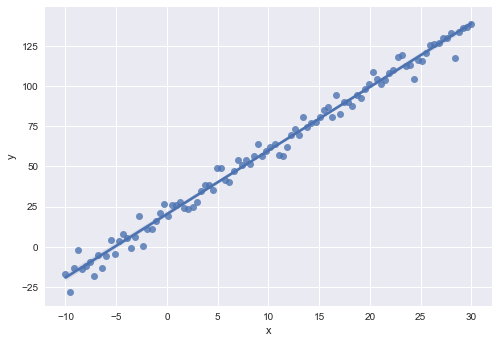

In [26]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [28]:
def MLE_Norm(parameters):
   # extract parameters
   const, beta, std_dev = parameters
   # predict the output
   pred = const + beta*x
   # Calculate the log-likelihood for normal distribution
   LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
   # Calculate the negative log-likelihood
   neg_LL = -1*LL
   return neg_LL

In [29]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 299.16131301125677
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.13686828e-05,  8.52651288e-05, -2.27373677e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 136
      nit: 28
     njev: 34
   status: 0
  success: True
        x: array([20.36984056,  3.95324845,  4.81951892])